<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.139785,54.698184,65.079091,-1.298342e-05,156.917047,156.917083,-0.000037
1,0.0,1.0,55.140692,43.377759,48.308439,3.945040e-05,156.826930,156.826924,0.000006
2,0.0,2.0,84.577149,81.103948,25.445608,2.554329e-06,201.126708,201.126707,0.000001
3,0.0,3.0,57.154513,83.918274,26.311947,-3.675687e-06,177.384730,177.384743,-0.000013
4,0.0,4.0,96.196912,50.596584,40.617636,-6.841909e-07,197.411131,197.411148,-0.000016
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.777836,36.442166,78.048628,-1.308488e-05,200.268617,200.268607,0.000010
59996,999.0,56.0,85.155514,55.295210,27.518902,-7.038402e-07,177.969626,177.969629,-0.000004
59997,999.0,57.0,94.501933,65.308142,60.723304,8.693830e-06,230.533388,230.533376,0.000013
59998,999.0,58.0,47.268400,26.976587,52.831809,3.272004e-05,137.076828,137.076776,0.000052


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    27.139785  54.698184  65.079091  ...  156.917047  156.917083 -0.000037
      1.0    55.140692  43.377759  48.308439  ...  156.826930  156.826924  0.000006
      2.0    84.577149  81.103948  25.445608  ...  201.126708  201.126707  0.000001
      3.0    57.154513  83.918274  26.311947  ...  177.384730  177.384743 -0.000013
      4.0    96.196912  50.596584  40.617636  ...  197.411131  197.411148 -0.000016
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   75.777836  36.442166  78.048628  ...  200.268617  200.268607  0.000010
      56.0   85.155514  55.295210  27.518902  ...  177.969626  177.969629 -0.000004
      57.0   94.501933  65.308142  60.723304  ...  230.533388  230.533376  0.000013
      58.0   47.268400  26.976587  52.831809  ...  137.076828  137.076776  0.000052
      59.0   61.368151  84.768305  67.406859  ...  223.543314  223.543317 -0.000003

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    27.139785  54.698184  65.079091  ...  156.917047  156.917083 -0.000037
      1.0    55.140692  43.377759  48.308439  ...  156.826930  156.826924  0.000006
      2.0    84.577149  81.103948  25.445608  ...  201.126708  201.126707  0.000001
      3.0    57.154513  83.918274  26.311947  ...  177.384730  177.384743 -0.000013
      4.0    96.196912  50.596584  40.617636  ...  197.411131  197.411148 -0.000016
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   75.777836  36.442166  78.048628  ...  200.268617  200.268607  0.000010
      56.0   85.155514  55.295210  27.518902  ...  177.969626  177.969629 -0.000004
      57.0   94.501933  65.308142  60.723304  ...  230.533388  230.533376  0.000013
      58.0   47.268400  26.976587  52.831809  ...  137.076828  137.076776  0.000052
      59.0   61.368151  84.768305  67.406859  ...  223.543314  223.543317 -0.000003

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,27.139785,54.698184,65.079091,-1.298342e-05,156.917047,156.917083,-0.000037
1,0.0,1.0,55.140692,43.377759,48.308439,3.945040e-05,156.826930,156.826924,0.000006
2,0.0,2.0,84.577149,81.103948,25.445608,2.554329e-06,201.126708,201.126707,0.000001
3,0.0,3.0,57.154513,83.918274,26.311947,-3.675687e-06,177.384730,177.384743,-0.000013
4,0.0,4.0,96.196912,50.596584,40.617636,-6.841909e-07,197.411131,197.411148,-0.000016
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,75.777836,36.442166,78.048628,-1.308488e-05,200.268617,200.268607,0.000010
59996,999.0,56.0,85.155514,55.295210,27.518902,-7.038402e-07,177.969626,177.969629,-0.000004
59997,999.0,57.0,94.501933,65.308142,60.723304,8.693830e-06,230.533388,230.533376,0.000013
59998,999.0,58.0,47.268400,26.976587,52.831809,3.272004e-05,137.076828,137.076776,0.000052


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    27.139785  54.698184  65.079091  ...  156.917047  156.917083 -0.000037
      1.0    55.140692  43.377759  48.308439  ...  156.826930  156.826924  0.000006
      2.0    84.577149  81.103948  25.445608  ...  201.126708  201.126707  0.000001
      3.0    57.154513  83.918274  26.311947  ...  177.384730  177.384743 -0.000013
      4.0    96.196912  50.596584  40.617636  ...  197.411131  197.411148 -0.000016
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   75.777836  36.442166  78.048628  ...  200.268617  200.268607  0.000010
      56.0   85.155514  55.295210  27.518902  ...  177.969626  177.969629 -0.000004
      57.0   94.501933  65.308142  60.723304  ...  230.533388  230.533376  0.000013
      58.0   47.268400  26.976587  52.831809  ...  137.076828  137.076776  0.000052
      59.0   61.368151  84.768305  67.406859  ...  223.543314  223.543317 -0.000003

[60000 rows x 7 columns]

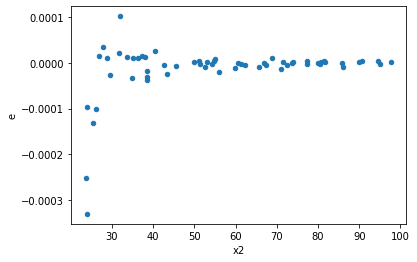

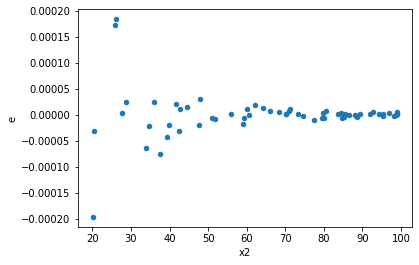

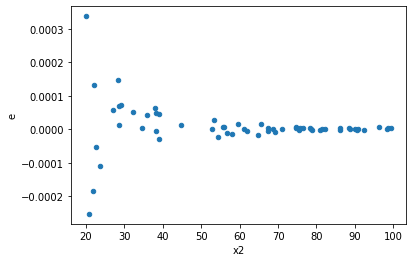

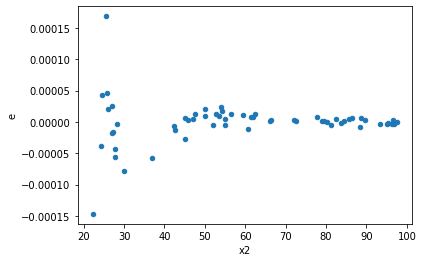

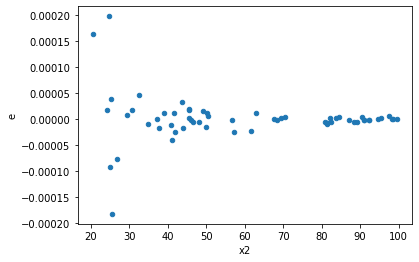

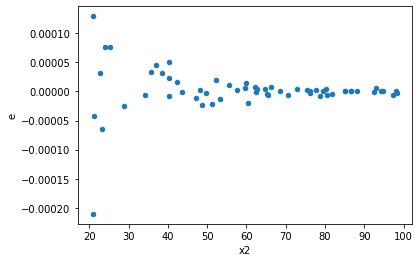

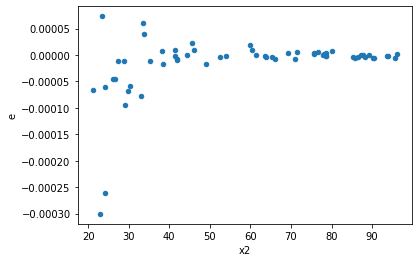

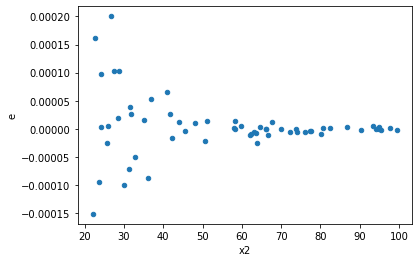

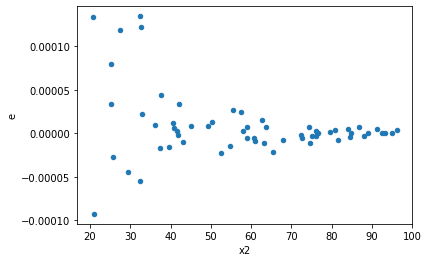

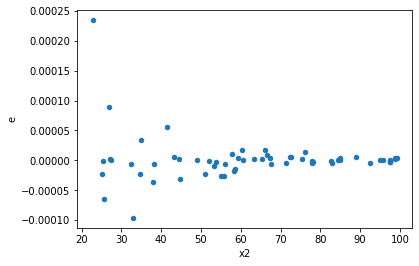

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,29.0,25.0,1.260481295853084e-09,1.0737559633142201e-07,4.5017189137610144e-11,4.473983180475917e-09,98.81597779691859,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
2.0,23.0,31.0,4.675380869394192e-10,2.0104864263978803e-07,2.1251731224519054e-11,6.7016214213262675e-09,319.04378728802976,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
3.0,26.0,28.0,3.258913716536679e-09,7.417767127189444e-08,1.3035654866146715e-10,2.7473211582183127e-09,21.13565199088621,1.610533928442237e-11,0.9999999999919473,Reject005=0 : Heteroscedasticity
4.0,34.0,20.0,7.199086918603197e-10,7.326395718574615e-08,2.1815414904858172e-11,3.8559977466182185e-09,173.00628346897918,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
5.0,28.0,26.0,8.306429388597216e-10,1.218404777971715e-07,3.07645532911008e-11,4.87361911188686e-09,157.96537369381875,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
7.0,26.0,28.0,1.9418633360209306e-08,3.118300962661302e-08,7.767453344083722e-10,1.154926282467149e-09,1.4911271694059403,0.30909591744783493,0.8454520412760825,Reject005=1 : Homoscedasticity
9.0,28.0,26.0,4.144966677376931e-08,5.6047424456319904e-08,1.5351728434729375e-09,2.241896978252796e-09,1.4561942108859298,0.33156725449979274,0.8342163727501036,Reject005=1 : Homoscedasticity
11.0,34.0,20.0,1.0427471718516437e-09,1.1142767874898165e-07,3.159839914701951e-11,5.864614670999034e-09,181.66153693507158,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
12.0,32.0,22.0,1.3616657748052327e-09,2.1945221745406143e-07,4.392470241307202e-11,1.0450105593050545e-08,234.42112689759225,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,25.0,1.260481295853084e-09,1.0737559633142201e-07,4.5017189137610144e-11,4.473983180475917e-09,98.81597779691859,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,25.0,29.0,1.5445121696380285e-07,2.264564485240709e-09,6.435467373491785e-09,8.087730304431104e-11,0.012639659314539826,3.1316981173625514e-20,Reject005=0 : Heteroscedasticity
2.0,23.0,31.0,4.675380869394192e-10,2.0104864263978803e-07,2.1251731224519054e-11,6.7016214213262675e-09,319.04378728802976,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,26.0,28.0,3.258913716536679e-09,7.417767127189444e-08,1.3035654866146715e-10,2.7473211582183127e-09,21.13565199088621,1.610533928442237e-11,Reject005=0 : Heteroscedasticity
4.0,34.0,20.0,7.199086918603197e-10,7.326395718574615e-08,2.1815414904858172e-11,3.8559977466182185e-09,173.00628346897918,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,28.0,26.0,8.306429388597216e-10,1.218404777971715e-07,3.07645532911008e-11,4.87361911188686e-09,157.96537369381875,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,26.0,28.0,8.012152939017043e-08,3.699157664129302e-08,3.2048611756068172e-09,1.3700583941219638e-09,0.4287152458066911,0.030518696114646564,Reject005=0 : Heteroscedasticity
7.0,26.0,28.0,1.9418633360209306e-08,3.118300962661302e-08,7.767453344083722e-10,1.154926282467149e-09,1.4911271694059403,0.30909591744783493,Reject005=1 : Homoscedasticity
8.0,30.0,24.0,6.864909750125318e-08,3.8861312186043126e-10,2.3672102586639028e-09,1.689622268958397e-11,0.007076078492024918,1.817223851801588e-20,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    783
Reject005=1 : Homoscedasticity      217
Name: Result_test, dtype: int64